In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,NaN,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,NaN,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,NaN
3,1.0,0.0,1.00000,-0.45161,1.00000,NaN,0.71216,-1.00000,0.00000,0.00000,...,1.00000,NaN,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,NaN,...,0.95378,-0.04202,0.83479,0.00123,NaN,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,NaN,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,NaN,...,0.93988,0.03193,0.92489,NaN,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	19
float64		column 3	0
float64		column 4	19
float64		column 5	18
float64		column 6	18
float64		column 7	18
float64		column 8	19
float64		column 9	0
float64		column 10	18
float64		column 11	37
float64		column 12	0
float64		column 13	0
float64		column 14	18
float64		column 15	0
float64		column 16	19
float64		column 17	18
float64		column 18	37
float64		column 19	0
float64		column 20	55
float64		column 21	36
float64		column 22	36
float64		column 23	0
float64		column 24	18
float64		column 25	18
float64		column 26	18
float64		column 27	19
float64		column 28	36
float64		column 29	18
float64		column 30	18
float64		column 31	0
float64		column 32	0
float64		column 33	18
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,333.000000,332.0,351.000000,332.000000,333.00000,333.000000,333.000000,332.000000,351.000000,333.000000,...,333.000000,333.000000,332.000000,315.000000,333.000000,333.000000,351.000000,351.000000,333.000000,333.000000
mean,0.885886,0.0,0.641342,0.037553,0.60771,0.111925,0.541279,0.117154,0.511848,0.169256,...,0.406864,-0.077119,0.548808,-0.056799,0.373880,-0.024176,0.352514,-0.003794,0.351967,0.017869
std,0.318428,0.0,0.497708,0.441045,0.50962,0.461154,0.495687,0.510552,0.507066,0.477194,...,0.569012,0.506966,0.514265,0.526144,0.568271,0.496841,0.571483,0.513574,0.521754,0.470055
min,0.000000,0.0,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064083,0.42328,-0.024650,0.196720,-0.052347,0.087110,-0.052630,...,0.000000,-0.344260,0.327450,-0.316520,0.000000,-0.223700,0.000000,-0.242595,0.000000,-0.156760
50%,1.000000,0.0,0.871110,0.010985,0.80804,0.022800,0.717710,0.014285,0.684210,0.016390,...,0.556770,-0.020990,0.708840,-0.017680,0.483480,0.000000,0.442770,0.000000,0.416670,0.000000
75%,1.000000,0.0,1.000000,0.176730,1.00000,0.315430,0.960260,0.372872,0.953240,0.471730,...,0.901390,0.145300,0.999918,0.149915,0.867470,0.153000,0.857620,0.200120,0.807740,0.172550
max,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

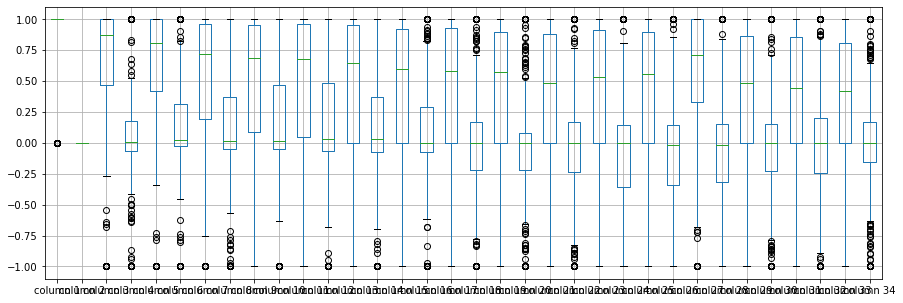

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.885886
column 2     0.000000
column 3     0.641342
column 4     0.037553
column 5     0.607710
column 6     0.111925
column 7     0.541279
column 8     0.117154
column 9     0.511848
column 10    0.169256
column 11    0.491938
column 12    0.155040
column 13    0.400801
column 14    0.091433
column 15    0.344159
column 16    0.071523
column 17    0.376801
column 18   -0.022552
column 19    0.359390
column 20   -0.040997
column 21    0.336373
column 22   -0.003920
column 23    0.362475
column 24   -0.061816
column 25    0.406864
column 26   -0.077119
column 27    0.548808
column 28   -0.056799
column 29    0.373880
column 30   -0.024176
column 31    0.352514
column 32   -0.003794
column 33    0.351967
column 34    0.017869
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.317498,-0.015434,0.199097,0.136395,0.227305,-0.017074,0.190690,-0.067285,...,0.052167,0.163117,-0.204942,0.007463,0.130977,-0.108668,0.165438,-0.098002,0.124195,-0.009080
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.317498,NaN,1.000000,0.169114,0.471750,0.022713,0.442033,0.006597,0.471614,0.065193,...,0.319926,-0.051805,0.087288,0.202627,0.338061,0.021705,0.246653,-0.009332,0.243431,0.039310
column 4,-0.015434,NaN,0.169114,1.000000,-0.035812,-0.231782,-0.042491,0.247066,-0.284878,0.205166,...,-0.174779,-0.203874,-0.046383,-0.019084,-0.041336,0.313880,-0.164633,-0.156197,-0.118416,0.006488
column 5,0.199097,NaN,0.471750,-0.035812,1.000000,0.050557,0.587110,-0.033610,0.502530,-0.006716,...,0.221198,-0.008930,0.154128,0.221874,0.232692,-0.012940,0.393091,-0.014846,0.391918,-0.056760
column 6,0.136395,NaN,0.022713,-0.231782,0.050557,1.000000,-0.023148,0.249898,-0.108931,0.194082,...,-0.128436,0.038895,-0.179798,-0.078274,-0.022968,-0.192721,-0.095536,0.293213,0.012900,0.185796
column 7,0.227305,NaN,0.442033,-0.042491,0.587110,-0.023148,1.000000,-0.146281,0.452531,-0.080893,...,0.276697,0.101996,0.087124,0.150135,0.258075,0.013513,0.397926,-0.009919,0.510400,-0.063916
column 8,-0.017074,NaN,0.006597,0.247066,-0.033610,0.249898,-0.146281,1.000000,-0.312343,0.328039,...,-0.140989,-0.121768,-0.231179,-0.028970,-0.127722,0.090428,-0.175138,0.175429,-0.173197,0.364404
column 9,0.190690,NaN,0.471614,-0.284878,0.502530,-0.108931,0.452531,-0.312343,1.000000,-0.276612,...,0.376090,0.119538,0.172901,0.220750,0.292590,-0.077273,0.316021,-0.067499,0.333301,-0.067852
column 10,-0.067285,NaN,0.065193,0.205166,-0.006716,0.194082,-0.080893,0.328039,-0.276612,1.000000,...,-0.231460,-0.002976,-0.220480,0.099412,-0.123232,0.030812,-0.150942,0.020795,-0.195058,0.131769


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+14,34+14+14,34+14+14+14,34+14+14+14+14,34+14+14+14,34+14+14,34+14,34], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.29901649838402
Epoch: 1 , loss: 19.22730255126953
Epoch: 2 , loss: 19.23375329517183
Epoch: 3 , loss: 19.17658960251581
Epoch: 4 , loss: 19.120153245471773
Epoch: 5 , loss: 19.15200496855236
Epoch: 6 , loss: 19.051358767918178
Epoch: 7 , loss: 18.96357300167992
Epoch: 8 , loss: 18.940933091299875
Epoch: 9 , loss: 19.024768647693453
Epoch: 10 , loss: 18.817782265799387
Epoch: 11 , loss: 18.712490354265487
Epoch: 12 , loss: 18.54624285016741
Epoch: 13 , loss: 18.371453784760973
Epoch: 14 , loss: 17.847344534737722
Epoch: 15 , loss: 17.217825753348215
Epoch: 16 , loss: 17.074591818309965
Epoch: 17 , loss: 16.62386149451846
Epoch: 18 , loss: 16.510824612208776
Epoch: 19 , loss: 16.613926524207706
Epoch: 20 , loss: 16.527779397510347
Epoch: 21 , loss: 16.726511728195916
Epoch: 22 , loss: 16.59260522751581
Epoch: 23 , loss: 16.529369672139484
Epoch: 24 , loss: 16.674642335800897
Epoch: 25 , loss: 16.51073

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10    0.028256
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -0.121611
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.499443,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.433262,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.397514
3,0.0,0.0,0.0,0.0,0.0,-0.980798,0.000000,0.0,0.0,0.000000,...,0.000000,-0.918843,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.058711,...,0.000000,0.000000,0.0,0.000000,-0.643978,0.0,0.0,0.0,0.000000,0.000000
347,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.003432,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
348,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.007087,...,0.000000,0.000000,0.0,-0.003075,0.000000,0.0,0.0,0.0,0.000000,0.000000
349,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

13.410859861552865

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.19589288193227605

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000268
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.556575
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.009884
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.023060,0.833980,-0.37708,1.00000,0.037600,...,0.568110,-0.511710,0.41078,-0.461680,0.212660,-0.34090,0.42267,-0.54487,0.186410,-0.453000
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.361560,0.390763,-0.93597,1.00000,-0.045490,...,-0.203320,-0.265690,-0.20468,-0.184010,-0.190400,-0.11593,-0.16626,-0.06288,0.295882,-0.024470
2,1.0,0.0,1.00000,-0.03365,1.00000,0.004850,1.000000,-0.12062,0.88965,0.011980,...,0.575280,-0.402200,0.58984,-0.221450,0.431000,-0.17365,0.60436,-0.24180,0.560450,0.015134
3,1.0,0.0,1.00000,-0.45161,1.00000,0.019202,0.712160,-1.00000,0.00000,0.000000,...,1.000000,-0.011893,0.51613,1.000000,1.000000,-0.20099,0.25682,1.00000,-0.323820,1.000000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.065310,0.921060,-0.23255,0.77152,-0.163990,...,0.032860,-0.651580,0.13290,-0.532060,0.024310,-0.62197,-0.05707,-0.59573,-0.046080,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.147060,0.843490,-0.05567,0.90441,0.012491,...,0.953780,-0.042020,0.83479,0.001230,0.356022,0.12815,0.86660,-0.10714,0.905460,-0.043070
347,1.0,0.0,0.95113,0.00419,0.95183,-0.027230,0.934380,-0.01920,0.94590,0.012628,...,0.945200,0.013610,0.93522,0.049250,0.931590,0.08168,0.94066,-0.00035,0.914830,0.047120
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.032270,0.951770,-0.03431,0.95584,0.017373,...,0.939880,0.031930,0.92489,0.022345,0.921200,0.02242,0.92459,0.00442,0.926970,-0.005770
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.019890,0.956910,-0.03646,0.85746,0.001100,...,0.910500,-0.020990,0.89147,-0.077600,0.829830,-0.17238,0.96022,-0.03757,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_NG_5(imp).xlsx", index=False, header=False)